366   2016366.1350
/data/keeling/a/yulanh/satellite/TerraDataArchive/MODIS/MOD021KM/2016/366/MOD021KM.A2016366.1350.061.2017329001559.hdf
/data/keeling/a/yulanh/satellite/TerraDataArchive/MODIS/MOD03/2016/366/MOD03.A2016366.1350.061.2017329000943.hdf
0.002823116519721225 0.002823116519721225
ot location (array([2010]), array([805])) 167.2133668834803 129.75778 -14.536466
189.5389338505231


/tmp/ipykernel_215402/3277615106.py:88: RuntimeWarning: invalid value encountered in log
  bt67=planck_c2/(6.72*np.log(planck_c1/(emis67*6.72**5.0)+1))


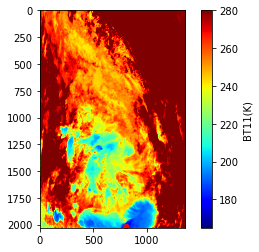

[[171.15348603 171.15348603 172.13932106 172.13932106 173.58584494
  174.49862412]
 [170.46009288 170.40608981 170.94182041 170.40608981 171.41601318
  173.39026735]
 [172.34289318 170.78209601 168.04470768 167.45333988 167.98610986
  169.63965792]
 [170.78209601 168.45162993 168.45162993 167.21336688 167.80960479
  169.52854446]
 [172.13932106 169.63965792 167.98610986 168.50930225 169.02332112
  171.04783767]
 [171.52039445 170.51399929 168.96664896 168.96664896 170.46009288
  172.8460408 ]] 167.2133668834803


In [8]:
def read_text(fname):
    fo=open(fname,'r') #create file object
    #headstr=fo.readline()
    data=fo.readlines()
    #print (data)
    fo.close()  # close object
    return data

# main
import os 
import matplotlib as mpl
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import glob
from pyhdf.SD import SD, SDC

planck_c1=1.191042e8
planck_c2=1.4387752e4

#fname='/data/keeling/a/yulanh/c/OT_output/MODIS_OTinfo_2018059.2125.txt'
#fname='/data/keeling/a/yulanh/c/OT_output/Aqua/2018/MODIS_MYDOTinfo_2018365.1415.txt'
fname='/data/keeling/a/yulanh/c/OT_output/Terra/2016/MODIS_OTinfo_2016366.1350.txt'
year='2016'

data=read_text(fname)
splitcol=data[0].split(' ')
Ncol=len(splitcol)-splitcol.count('')
Nrow=len(data)
xscp=np.zeros(Nrow,'i')
yscp=np.zeros(Nrow,'i')
lon =np.zeros(Nrow,'f')
lat =np.zeros(Nrow,'f')
prob=np.zeros(Nrow,'f')


# transfer data from string to float
dataT=np.zeros((Nrow,Ncol),'f')
for i in range(Nrow):
    splitcol=data[i].split(' ')
    k=0
    for j in range(len(splitcol)):
        if splitcol[j] != '' and splitcol[j] != '\n' : 
            dataT[i,k]=float(splitcol[j])
            k=k+1
            
    xscp[i]=dataT[i,0]
    yscp[i]=dataT[i,1]
    lon[i]=dataT[i,2]
    lat[i]=dataT[i,3]
    prob[i]=dataT[i,4]
    
#=== read bt data ====
yyyymmdd=fname[-16:-4]
Julday=yyyymmdd[4:7]
print(Julday,' ',yyyymmdd)
mod02fname=glob.glob('/data/keeling/a/yulanh/satellite/TerraDataArchive/MODIS/MOD021KM/'+\
                     year+'/'+Julday+'/MOD021KM.A'+yyyymmdd+'*')[0]
#mod02fname=glob.glob('/data/keeling/a/yulanh/f/MODIS/MYD021KM/'+\
#                                 year+'/'+Julday+'/MYD021KM.A'+yyyymmdd+'*')[0]
print(mod02fname)
hdf=SD(mod02fname,SDC.READ)
emis_obj=hdf.select('EV_1KM_Emissive')

mod03fname=glob.glob('/data/keeling/a/yulanh/satellite/TerraDataArchive/MODIS/MOD03/'+\
                     year+'/'+Julday+'/MOD03.A'+yyyymmdd+'*')[0]
#mod03fname=glob.glob('/data/keeling/a/yulanh/f/MODIS/MYD03/'+\
#                                 year+'/'+Julday+'/MYD03.A'+yyyymmdd+'*')[0]
print(mod03fname)
hdf=SD(mod03fname)
modlat=hdf.select('Latitude')
modlat=modlat[:,:]
modlon=hdf.select('Longitude')
modlon=modlon[:,:]

for key, value in emis_obj.attributes().items():
    if key == 'radiance_offsets':
        add_offset = value  
    if key == 'radiance_scales':
        scale_factor = value
emis11=scale_factor[10]*(emis_obj[10,:,:]-add_offset[10])
bt11=planck_c2/(11.03*np.log(planck_c1/(emis11*11.03**5.0)+1))
a=np.abs(bt11 -167.21619)
print(np.min(a),a[2010,805])
print('ot location',np.where(np.min(a) == a ),bt11[2010,805],modlon[2010,805],modlat[2010,805])
emis67=scale_factor[6]*(emis_obj[6,:,:]-add_offset[6])
bt67=planck_c2/(6.72*np.log(planck_c1/(emis67*6.72**5.0)+1))
print(bt67[2010,805])
#print(bt11.shape,bt11[yscp,xscp])
plt.figure()
#p=plt.pcolormesh(modlon,modlat,bt67,vmin=165,vmax=170,cmap=plt.get_cmap('jet'))#
p=plt.imshow(bt11,vmin=165,vmax=280,cmap='jet')
#plt.xlim([900,1200])
#plt.ylim([300,500])
plt.colorbar(p,label='BT11(K)')   


#print(modlat[yscp,xscp])
#print(modlon[yscp,xscp])
#print(lon,lon)
xscp=[805]
yscp=[2010]
p1=plt.scatter(xscp,yscp,s=20,color='r')#,c=prob,cmap=plt.get_cmap('cool'),vmin=0,vmax=1)
#cb=plt.colorbar(p1,orientation='horizontal') 
#cb.ax.tick_params(labelsize=15)
#cb.set_label(label='P',size=15)
plt.show()
x=2010
y=805
print(bt11[x-3:x+3,y-3:y+3],bt11[x,y])


In [9]:
print(fname)
print(fname[-12:-9])
print(fname[-16:-4])

/data/keeling/a/yulanh/c/OT_output/Terra/2018/MODIS_OTinfo_2018059.2125.txt
059
2018059.2125
